In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from src.helper import get_split_data

In [2]:
X_trn, y_trn, X_val, y_val, X_tst, y_tst = get_split_data.split_data_for_training(6)

X = pd.concat([X_trn, X_val], axis='index')
y = pd.Series([*y_trn, *y_val], index=X.index)

In [3]:
from sklearn.metrics import precision_score

xg = xgb.XGBClassifier(random_state=42)
xg.fit(X_trn, y_trn, eval_set=[(X_trn, y_trn), (X_val, y_val)], verbose=False)
y_pred = xg.predict(X_tst)

precision_score(y_tst, y_pred, average='binary').round(3)

np.float64(0.0)

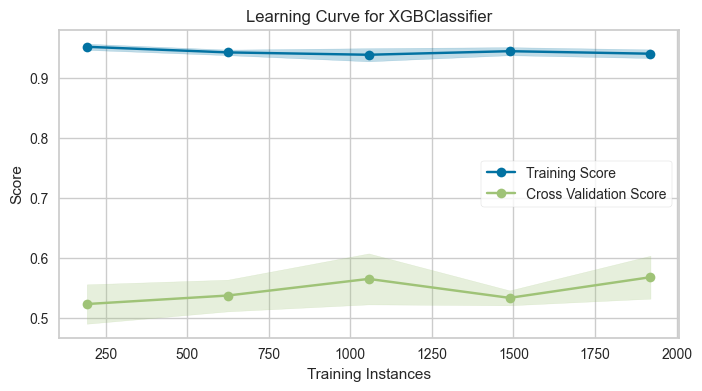

(0.6, 1.0)

In [5]:
from sklearn.model_selection import TimeSeriesSplit
import yellowbrick.model_selection as ms

params = {'colsample_bytree': 0.8604563037840777,
              'gamma': 3.4674453268197127,
              'learning_rate': 0.2905259345730205,
              'max_depth': 9,
              'n_estimators': 500,
              'reg_alpha': 0.002112657933466668,
              'reg_lambda': 0.040320307774314994,
              'subsample': 0.8444448235278171,
              }

fig, ax = plt.subplots(figsize=(8, 4))
viz = ms.learning_curve(xgb.XGBClassifier(**params), X, y, scoring='precision', ax=ax)

ax.set_ylim(0.6, 1)